In [433]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
pd.pandas.set_option('display.max_columns',None)

## Data Analysis

In [434]:
## Reading csv File
df = pd.read_csv('train.csv')
dftest = pd.read_csv('testdata.csv')

In [435]:
df.shape

(1460, 81)

In [436]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Missing Values

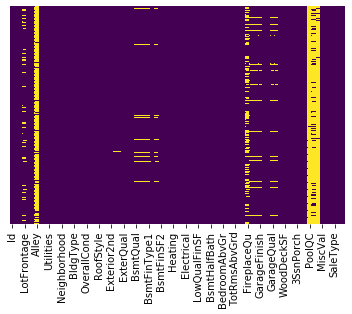

In [437]:
#Yellow  colour Represents Null Values

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [438]:
### Printing % of Missing Values
# df.isnull()
df['LotFrontage'].isnull().sum()
missing = [feature for feature in df.columns if df[feature].isnull().sum()>=1]
for i in missing:
    print(i,np.round((df[i].isnull().sum()/1460)*100,4),'%')
print('Number of Columns that has missing values = ',len(missing))

LotFrontage 17.7397 %
Alley 93.7671 %
MasVnrType 0.5479 %
MasVnrArea 0.5479 %
BsmtQual 2.5342 %
BsmtCond 2.5342 %
BsmtExposure 2.6027 %
BsmtFinType1 2.5342 %
BsmtFinType2 2.6027 %
Electrical 0.0685 %
FireplaceQu 47.2603 %
GarageType 5.5479 %
GarageYrBlt 5.5479 %
GarageFinish 5.5479 %
GarageQual 5.5479 %
GarageCond 5.5479 %
PoolQC 99.5205 %
Fence 80.7534 %
MiscFeature 96.3014 %
Number of Columns that has missing values =  19


###### Delete features with high number of missing values

In [439]:
features_todelete = ['Alley','FireplaceQu','PoolQC','Fence','MiscFeature']
df.drop(features_todelete,axis=1,inplace=True)
dftest.drop(features_todelete,axis=1,inplace=True)

In [443]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

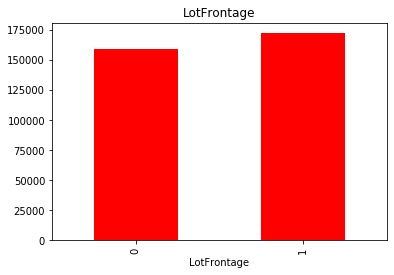

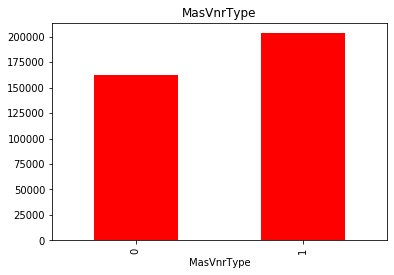

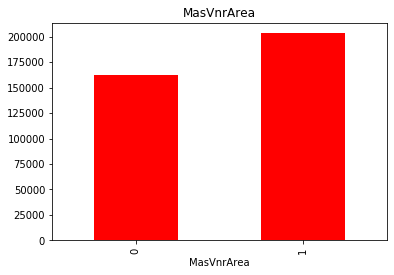

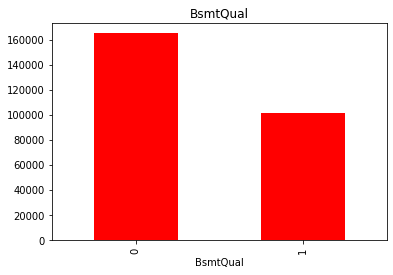

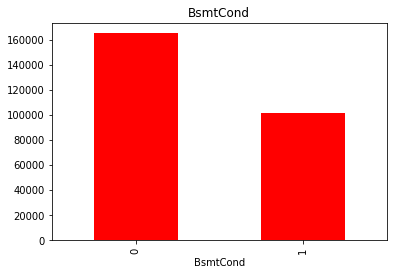

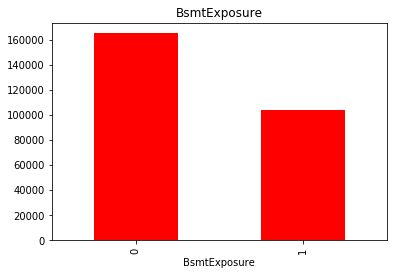

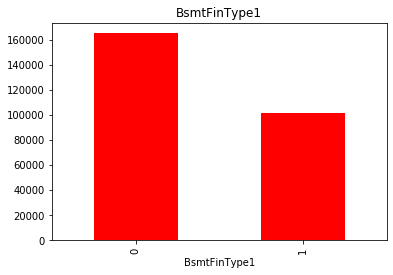

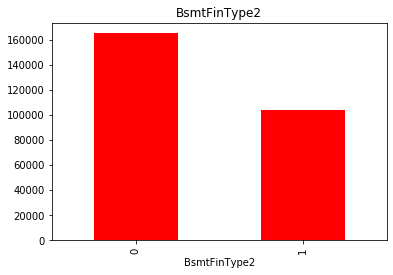

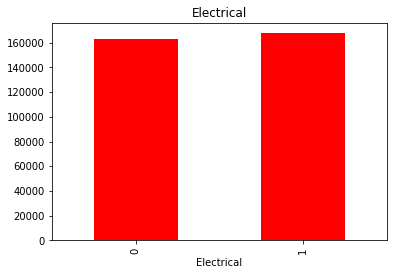

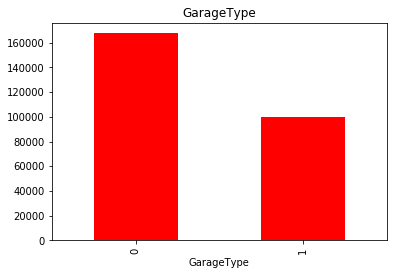

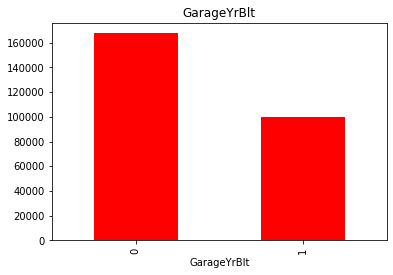

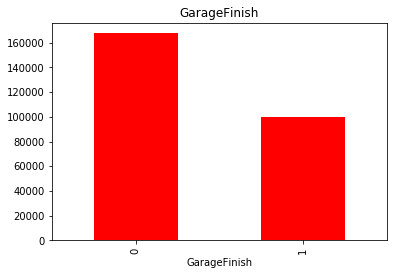

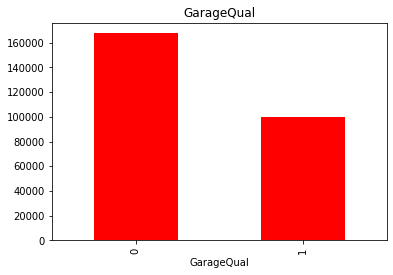

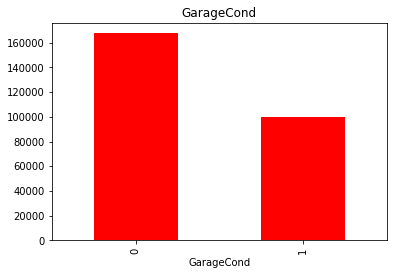

14


In [444]:
i = 0
data = df.copy()
missing = [feature for feature in df.columns if df[feature].isnull().sum()>=1]

for feature in missing:

    # we make missing values as 1 else zero
    data[feature] = np.where(data[feature].isnull(),1,0)
    #calculating median of salesprice where there are missing values
    data.groupby(feature)['SalePrice'].median().plot(kind='bar',color = 'r')
    plt.title(feature)
    i+=1
    plt.show()
print(i)
    

#### Numerical Features

In [445]:
numerical = [feature for feature in df.columns if df[feature].dtype!='O']
print('There are',len(numerical),'numerical columns')
data[numerical].sample(10)


There are 38 numerical columns


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
308,309,30,1,12342,4,5,1940,1950,0,262,0,599,861,861,0,0,861,0,0,1,0,1,1,4,0,0,2,539,158,0,0,0,0,0,0,3,2009,82500
195,196,160,0,2280,6,6,1976,1976,0,566,0,289,855,855,601,0,1456,0,0,2,1,3,1,7,1,0,2,440,87,0,0,0,0,0,0,7,2009,148500
1182,1183,60,0,15623,10,5,1996,1996,0,2096,0,300,2396,2411,2065,0,4476,1,0,3,1,4,1,10,2,0,3,813,171,78,0,0,0,555,0,7,2007,745000
1103,1104,20,0,8910,6,6,1959,1959,0,655,0,0,655,1194,0,0,1194,0,1,1,0,3,1,6,1,0,2,539,0,0,192,0,0,0,0,7,2006,159500
879,880,20,1,7000,5,8,1978,2005,0,646,0,218,864,864,0,0,864,1,0,1,0,3,1,6,0,0,1,336,0,0,0,0,0,0,0,7,2009,136500
105,106,60,0,9375,8,5,2003,2004,0,0,0,1053,1053,1053,939,0,1992,0,0,2,1,3,1,9,1,0,2,648,140,45,0,0,0,0,0,8,2008,250000
392,393,20,1,8339,5,7,1959,1959,0,0,0,0,0,882,0,0,882,0,0,1,0,3,1,5,0,0,1,294,0,0,0,0,0,0,1200,7,2007,106500
1137,1138,50,0,6342,5,8,1875,1996,0,0,0,780,780,780,240,0,1020,0,0,1,0,2,1,6,0,1,0,0,0,0,176,0,0,0,0,5,2010,94000
1379,1380,80,0,9735,5,5,2006,2007,0,0,0,384,384,754,640,0,1394,0,0,2,1,3,1,7,0,0,2,400,100,0,0,0,0,0,0,5,2008,167500
974,975,70,0,11414,7,8,1910,1993,0,0,0,728,728,1136,883,0,2019,0,0,1,0,3,1,8,0,0,2,532,509,135,0,0,0,0,0,10,2009,167500


In [446]:
year_columns = [col for col in df.columns if 'Yr' in col or 'Year' in col]

In [447]:
year_columns

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Text(0, 0.5, 'saleprice')

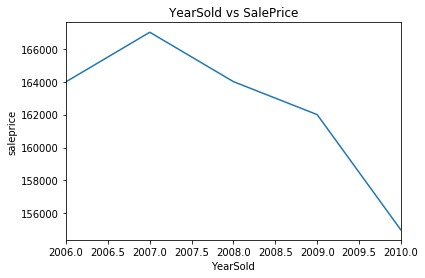

In [448]:
df.groupby('YrSold')['SalePrice'].median().plot()
plt.title('YearSold vs SalePrice')
plt.xlabel('YearSold')
plt.ylabel('saleprice',)

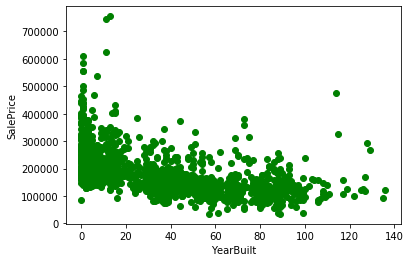

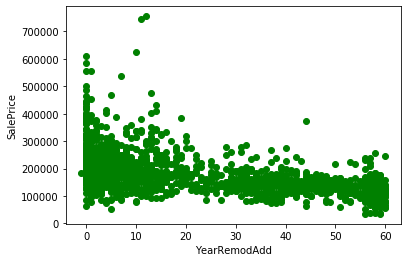

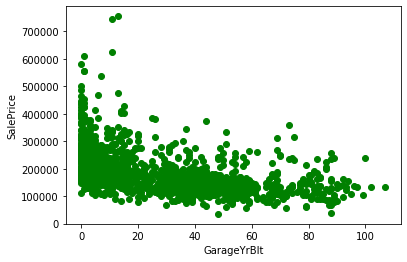

In [449]:
for feature in year_columns:
    if feature != 'YrSold':
        data  = df.copy()
        #plotting the difference between year variable and year sold vs SalePrice
        data[feature] = df['YrSold'] - df[feature]
        plt.scatter(data[feature],data['SalePrice'],color = 'g')
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

###### Discrete Variables

In [450]:
# Extracting descrete numerical Features
discrete_features = [feature for feature in numerical if len(df[feature].unique())<25 and feature not in year_columns]
print(len(discrete_features))
discrete_features


17


['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [451]:
df[discrete_features].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


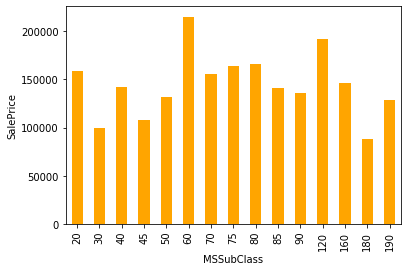

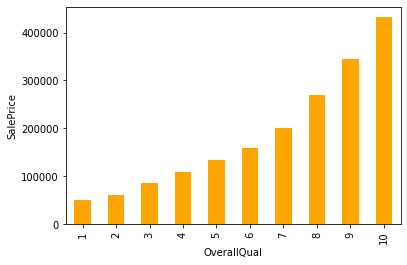

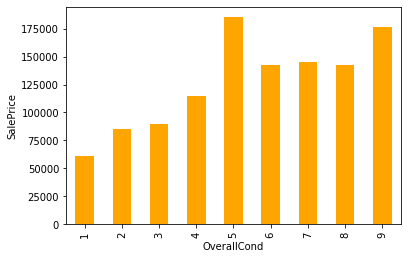

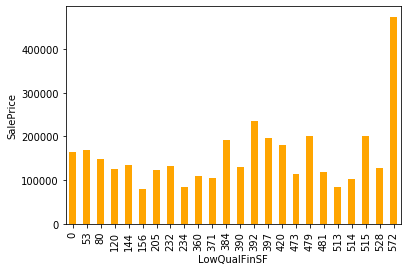

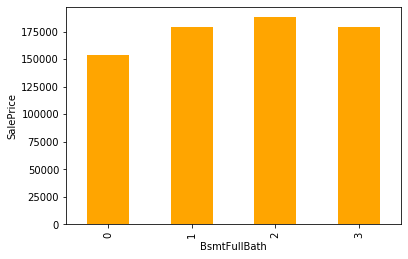

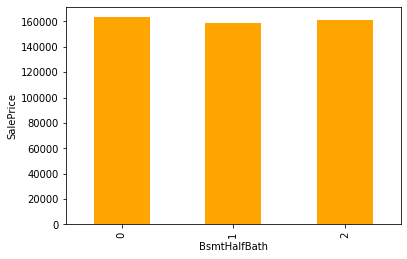

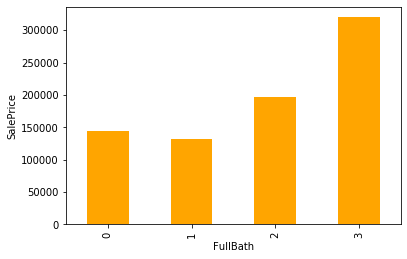

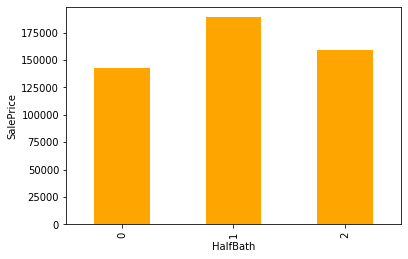

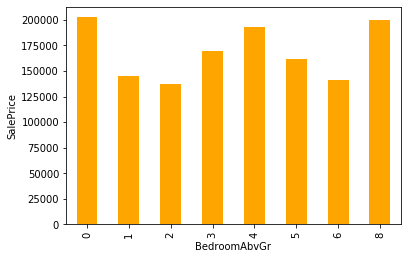

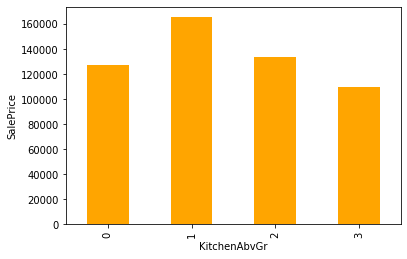

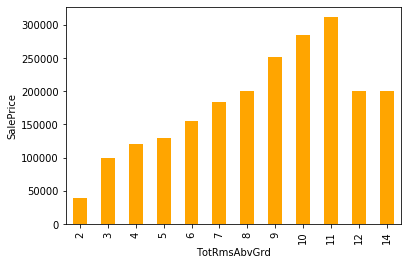

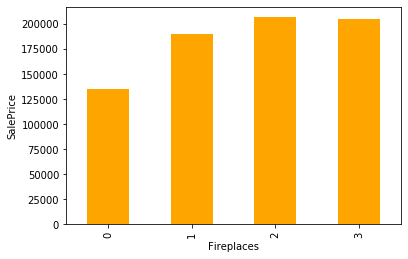

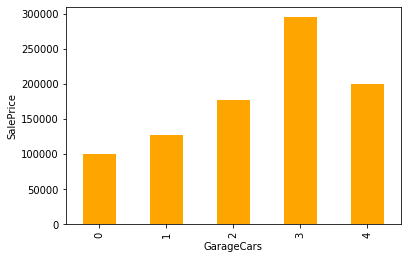

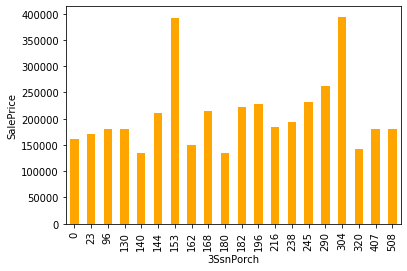

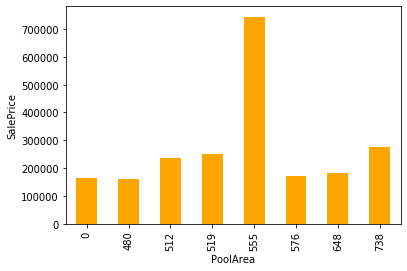

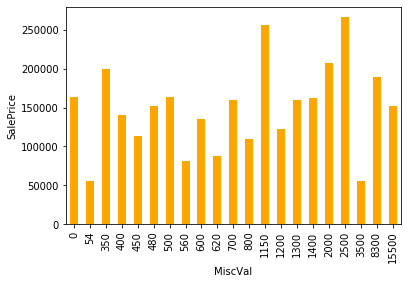

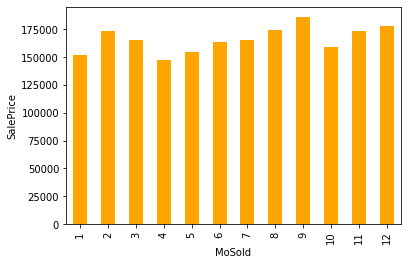

In [452]:
# Finding Relationship Between discrete_features and SalePrice
for feature in discrete_features:
    df.groupby(feature)['SalePrice'].median().plot.bar(color = 'orange')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

###### Continous Variable

In [453]:
# Extracting descrete numerical Features
continous_features = [feature for feature in numerical if feature not in discrete_features and feature not in year_columns +['Id']]
print(len(continous_features))
continous_features


16


['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

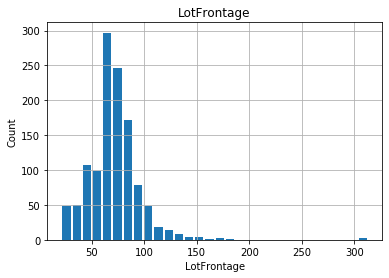

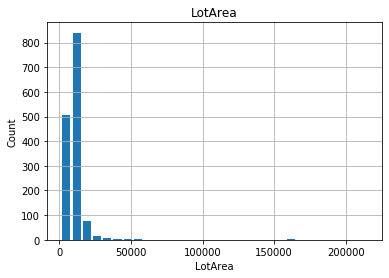

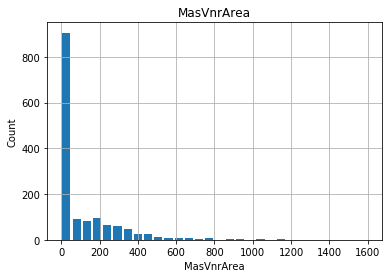

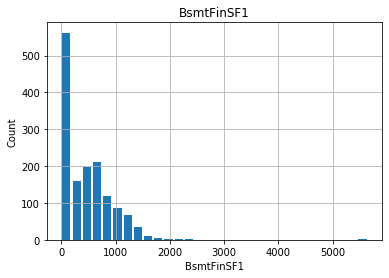

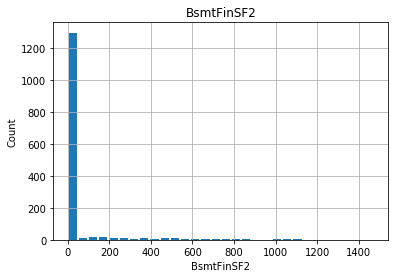

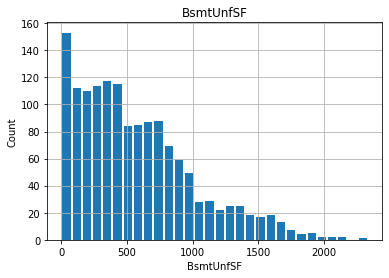

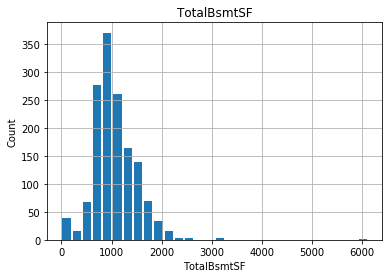

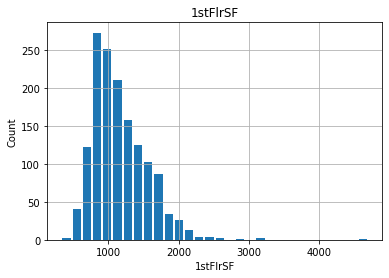

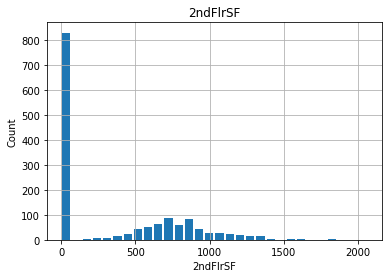

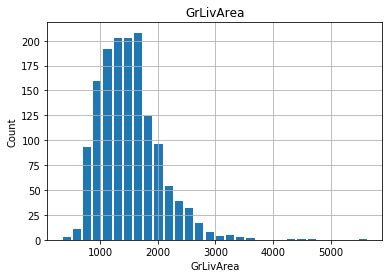

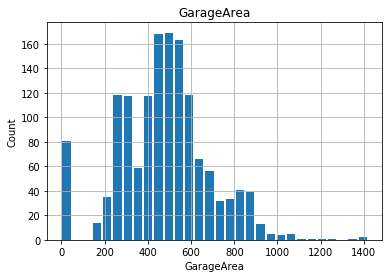

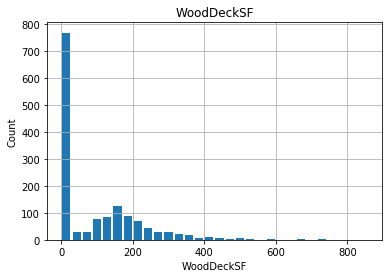

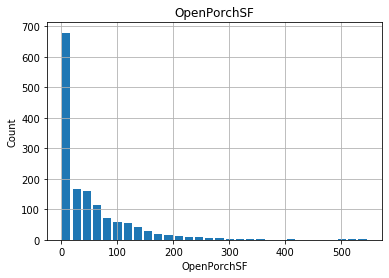

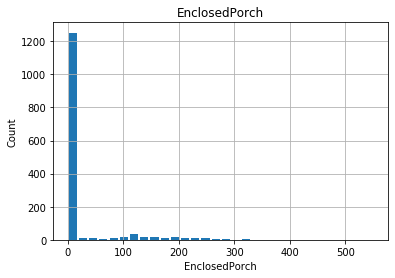

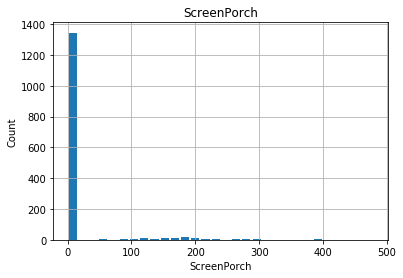

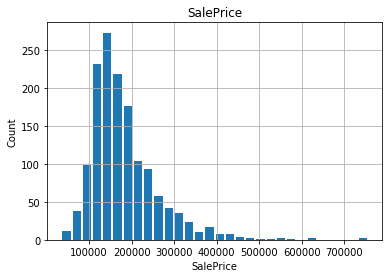

In [454]:

## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continous_features:
    data=df.copy()
    data[feature].hist(bins=30,rwidth=0.8)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

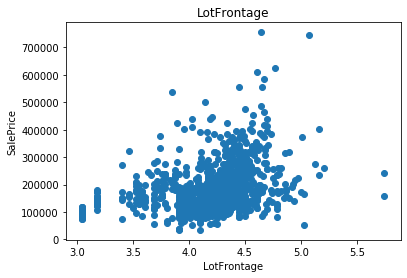

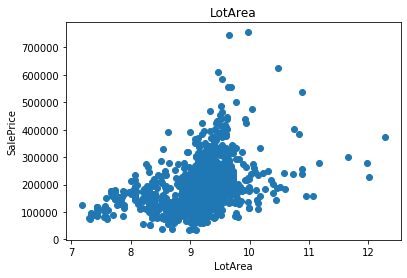

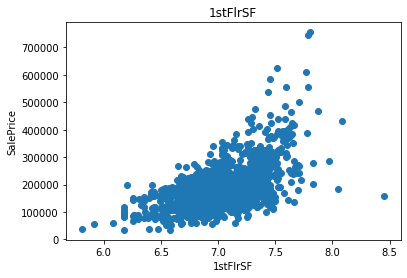

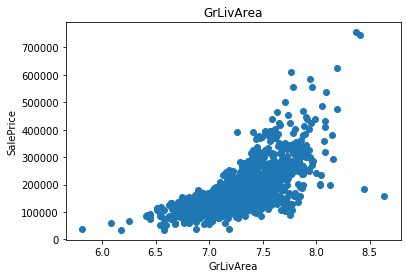

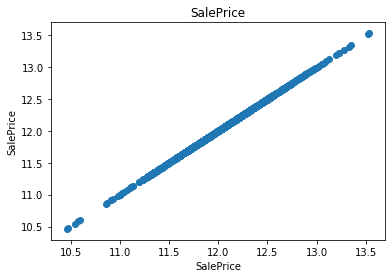

In [455]:
# Applying Logorithmic Transforrmation
for feat in continous_features:
    data = df.copy()
    if 0 in df[feat].unique():
        pass
    else:
        data[feat] = np.log(data[feat])
        data['SalaPrice'] = np.log(data['SalePrice'])
        plt.scatter(data[feat],data['SalePrice'])
        plt.xlabel(feat)
        plt.ylabel('SalePrice')
        plt.title(feat)
        plt.show()

###### Outlier Detection

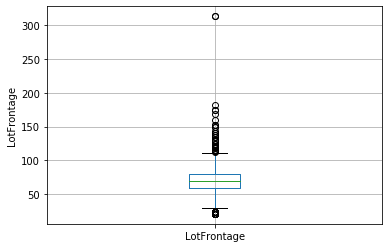

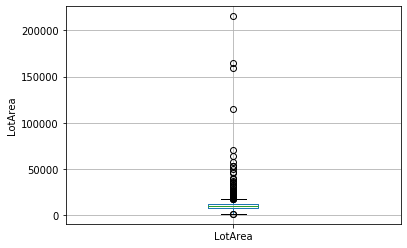

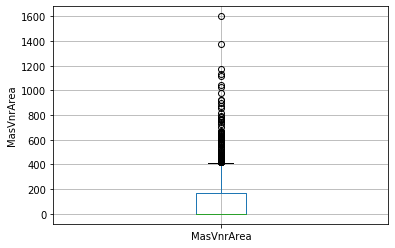

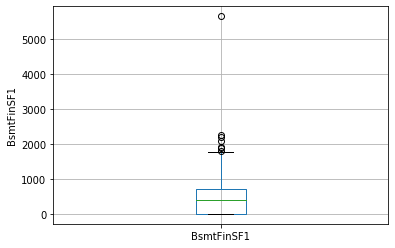

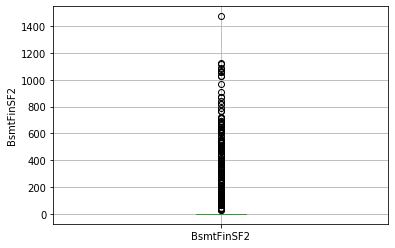

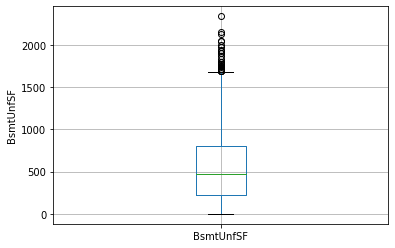

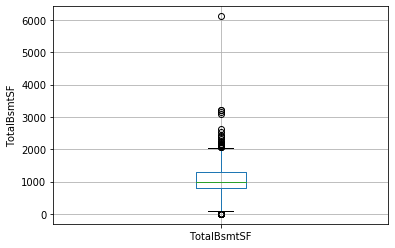

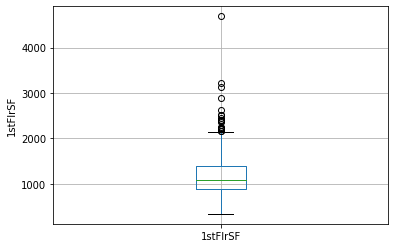

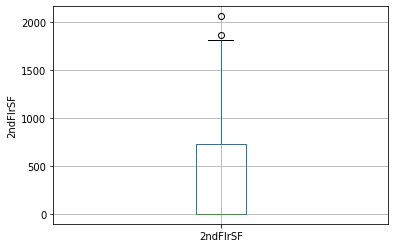

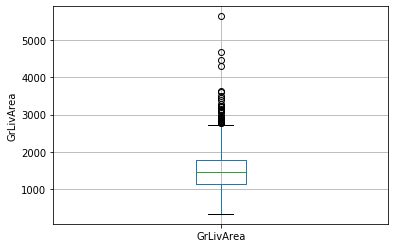

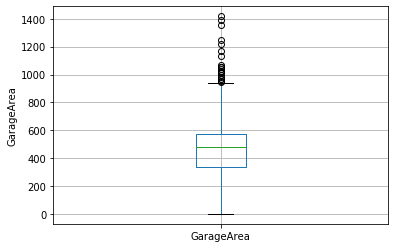

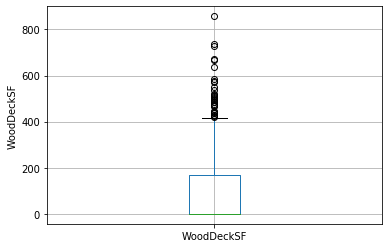

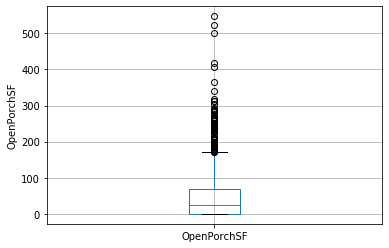

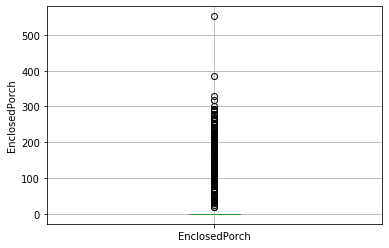

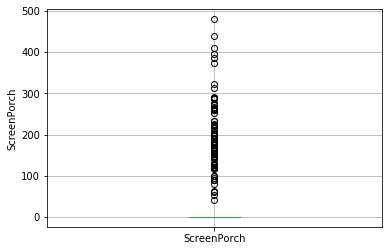

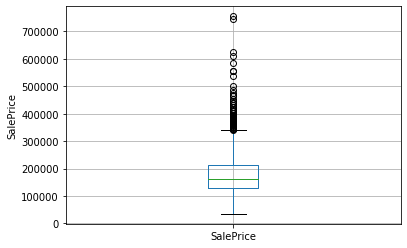

In [456]:
for feat in continous_features:
    data = df.copy()
    data['SalaPrice'] = np.log(data['SalePrice'])
    data.boxplot(column = feat)
    plt.ylabel(feat)
    plt.show()

    

###### Categorical Features

In [457]:
Categorical = [feature for feature in df.columns if df[feature].dtype=='O']
print('There are',len(Categorical),'Categorical columns')
Categorical

There are 38 Categorical columns


['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [458]:
df[Categorical].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [459]:
for feat in Categorical:
    print(feat,'Contain',len(df[feat].unique()),'Unique Features')
    print()

MSZoning Contain 5 Unique Features

Street Contain 2 Unique Features

LotShape Contain 4 Unique Features

LandContour Contain 4 Unique Features

Utilities Contain 2 Unique Features

LotConfig Contain 5 Unique Features

LandSlope Contain 3 Unique Features

Neighborhood Contain 25 Unique Features

Condition1 Contain 9 Unique Features

Condition2 Contain 8 Unique Features

BldgType Contain 5 Unique Features

HouseStyle Contain 8 Unique Features

RoofStyle Contain 6 Unique Features

RoofMatl Contain 8 Unique Features

Exterior1st Contain 15 Unique Features

Exterior2nd Contain 16 Unique Features

MasVnrType Contain 5 Unique Features

ExterQual Contain 4 Unique Features

ExterCond Contain 5 Unique Features

Foundation Contain 6 Unique Features

BsmtQual Contain 5 Unique Features

BsmtCond Contain 5 Unique Features

BsmtExposure Contain 5 Unique Features

BsmtFinType1 Contain 7 Unique Features

BsmtFinType2 Contain 7 Unique Features

Heating Contain 6 Unique Features

HeatingQC Contain 5 Uni

In [460]:
#Finding Relationship Between Categorical Features and SalePrice 

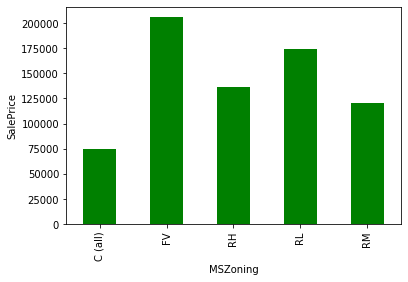

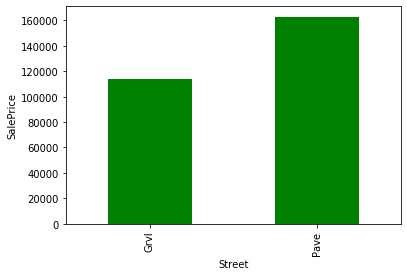

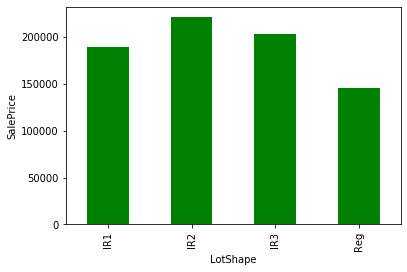

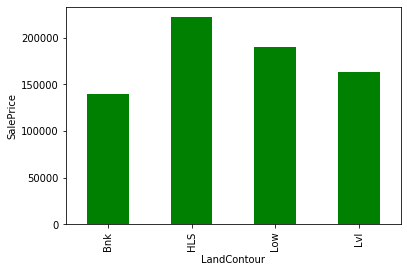

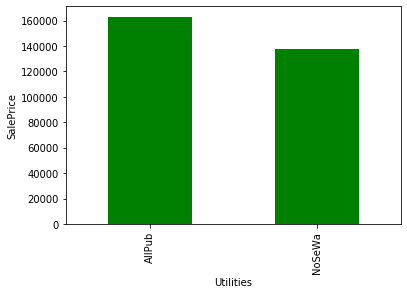

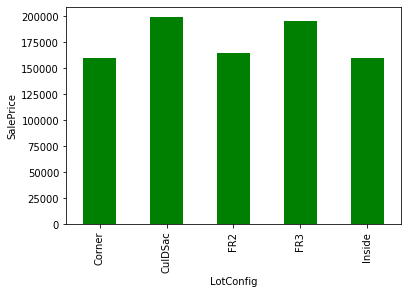

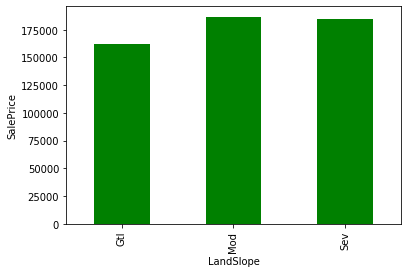

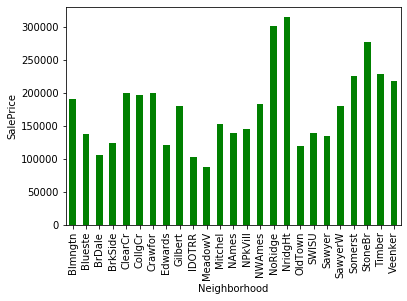

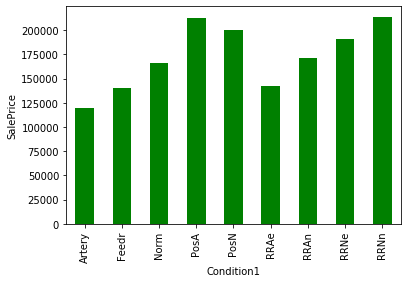

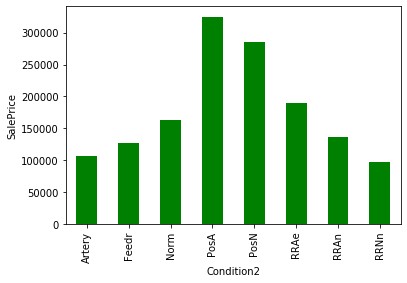

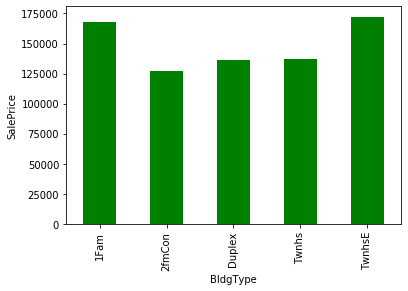

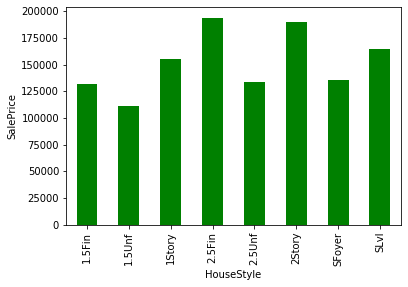

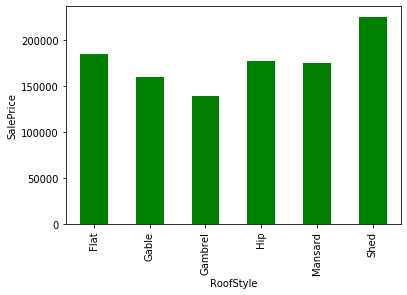

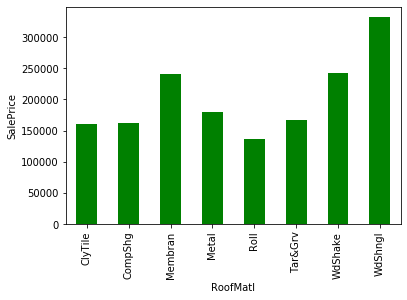

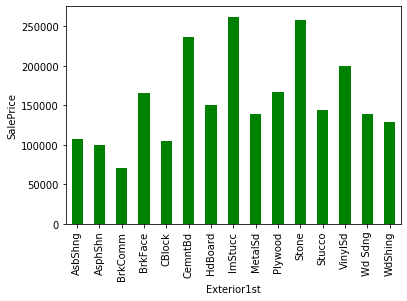

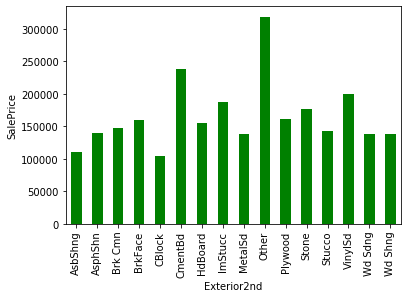

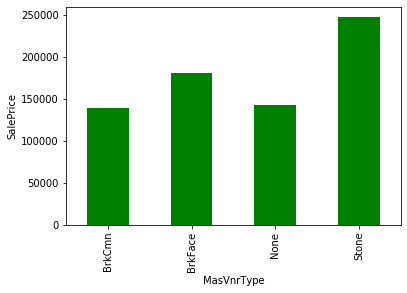

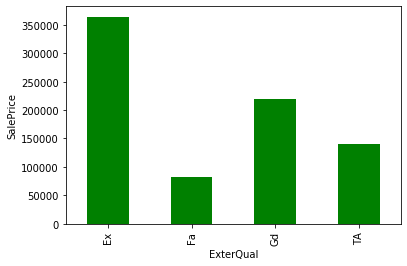

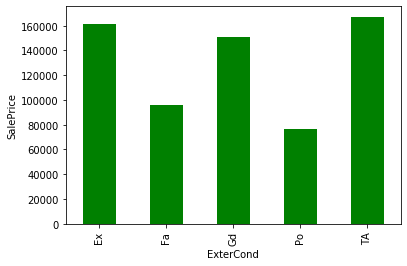

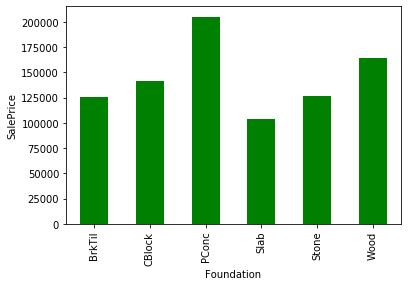

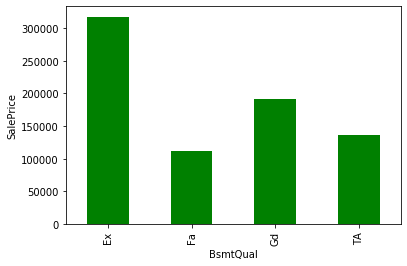

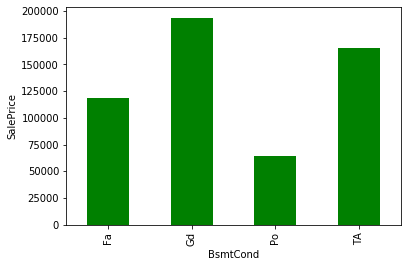

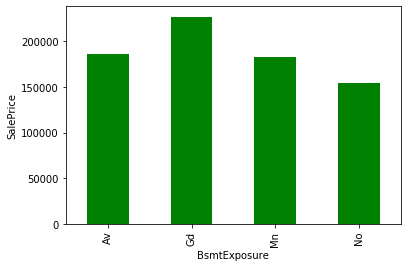

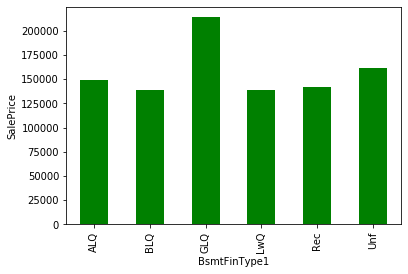

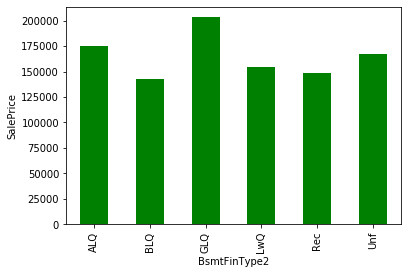

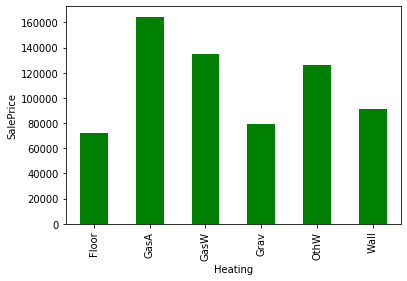

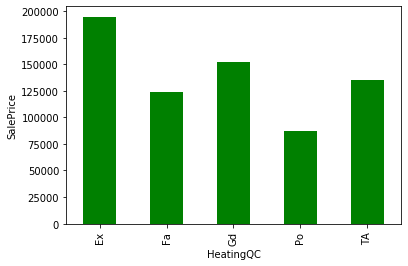

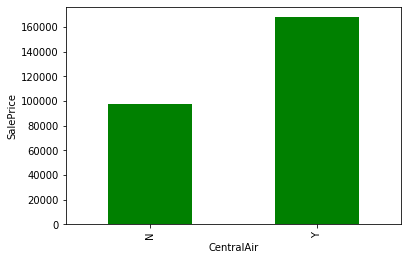

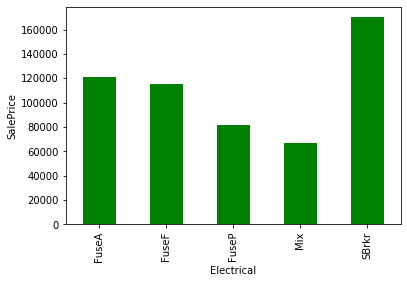

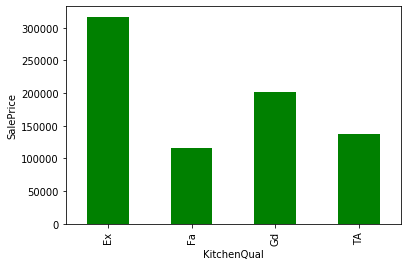

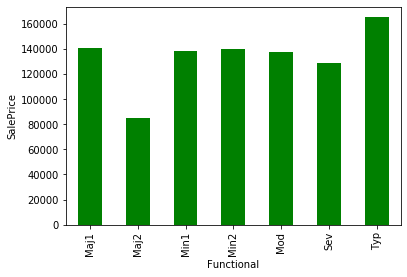

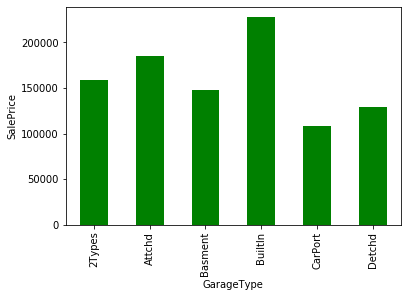

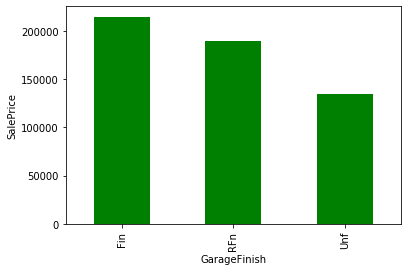

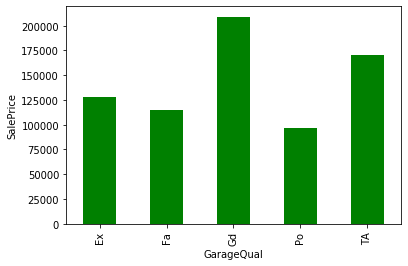

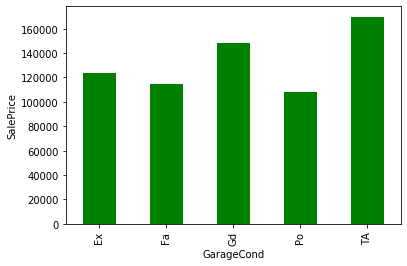

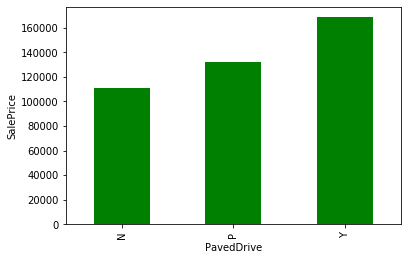

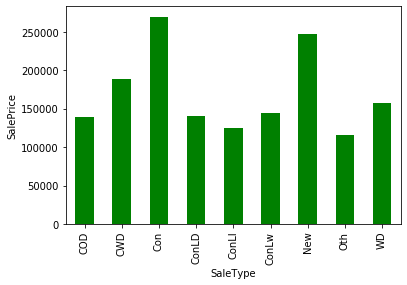

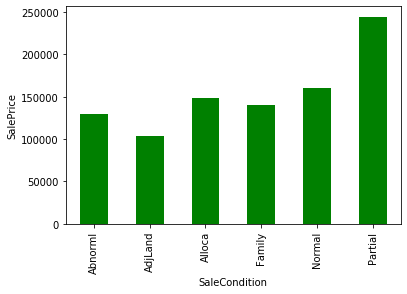

In [461]:
for feat in Categorical:
    data  = df.copy()
    data.groupby(feat)['SalePrice'].median().plot.bar(color='g')
    plt.xlabel(feat)
    plt.ylabel('SalePrice')
    plt.show()

## 2.Feature Engineering

###### Handling Missing Values

In [462]:
## Finding Nan categorical Features

Categorical_nandf = [feature for feature in df.columns if df[feature].dtype=='O' and df[feature].isnull().sum()>0]
Categorical_nan_dftest = [feature for feature in dftest.columns if dftest[feature].dtype=='O' and dftest[feature].isnull().sum()>0]


In [463]:
Categorical_nan_dftest

['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'SaleType']

In [464]:
## For handling categorical mising values we create a new label
def replace_nan(df,feature):
    data = df.copy()
    data[feature] = data[feature].fillna('Missing')
    return data
df = replace_nan(df,Categorical_nandf)
dftest = replace_nan(dftest,Categorical_nan_dftest)

In [465]:
dftest[Categorical_nan_dftest].isnull().sum()

MSZoning        0
Utilities       0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
KitchenQual     0
Functional      0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
SaleType        0
dtype: int64

In [466]:
# Handling NaN values in Numerical values
numerical_nan_df = [feature for feature in df.columns if df[feature].dtype!='O' and df[feature].isnull().sum()>0 ]
numerical_nan_dftest = [feature for feature in dftest.columns if dftest[feature].dtype!='O' and dftest[feature].isnull().sum()>0 ]

In [467]:
numerical_nan_dftest

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

In [468]:
# Handling NaN values in Numerical values
for feature in numerical_nan_df:
    median = df[feature].median()
    df[feature+'_nan'] = np.where(df[feature].isnull(),1,0) # we create these columns so that we can trace nan values
    df[feature].fillna(median,inplace=True)
df[numerical_nan_df].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [469]:
# Handling NaN values in Numerical values
for feature in numerical_nan_dftest:
    mediantest = dftest[feature].median()
    dftest[feature+'_nan'] = np.where(dftest[feature].isnull(),1,0)
    dftest[feature].fillna(mediantest,inplace=True)
dftest[numerical_nan_dftest].isnull().sum()

LotFrontage     0
MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
GarageCars      0
GarageArea      0
dtype: int64

In [470]:
dftest.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,BsmtFinSF1_nan,BsmtFinSF2_nan,BsmtUnfSF_nan,TotalBsmtSF_nan,BsmtFullBath_nan,BsmtHalfBath_nan,GarageYrBlt_nan,GarageCars_nan,GarageArea_nan
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,0,0,0,0,0,0,0,0,0,0,0


In [471]:
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,0,0,0


In [472]:
## Filling Year Columns with their age
for feat in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    df[feat] = df['YrSold'] - df[feat]
    dftest[feat] = dftest['YrSold'] - dftest[feat]

    

In [473]:
df[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']].head(30)

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0
5,16,14,16.0
6,3,2,3.0
7,36,36,36.0
8,77,58,77.0
9,69,58,69.0


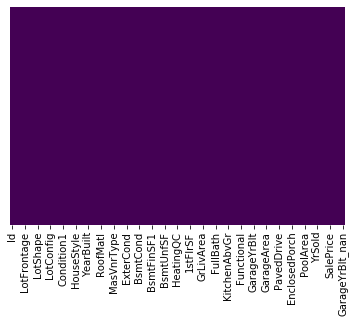

In [474]:
#Checking whether there are any missing values remaining
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [475]:
# Converting Numerical Variables in to Log Normal Distribution
num_features = ['LotFrontage','1stFlrSF','GrLivArea','LotArea']
for feat in num_features:
    df[feat] = np.log(df[feat])
num_features2 = ['LotFrontage','1stFlrSF','GrLivArea','LotArea']
for feat in num_features2:
    dftest[feat] = np.log(dftest[feat])


In [476]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,RL,4.174387,9.041922,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,0,0,0


#### Encoding

In [477]:
categorical_features = [feature for feature in df.columns if df[feature].dtype=='O']
dftest[categorical_features] 

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
1,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,None,Gd,TA,PConc,Gd,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,Gable,CompShg,CemntBd,CmentBd,None,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,Missing,Missing,Missing,Missing,Y,WD,Normal
1455,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,Gable,CompShg,CemntBd,CmentBd,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,TA,Typ,CarPort,Unf,TA,TA,Y,WD,Abnorml
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,Gable,CompShg,HdBoard,Wd Shng,None,TA,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,Missing,Missing,Missing,Missing,Y,WD,Normal


In [478]:
from sklearn.preprocessing import LabelEncoder
for i in categorical_features:
    le = LabelEncoder()
    label = le.fit_transform(df[i])
    df[i] = label
    label = le.fit_transform(dftest[i])
    dftest[i] = label
    




In [479]:
# All data is converted to numerical data using label encoding
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,3,4.174387,9.041922,1,3,3,0,4,0,5,2,2,0,5,7,5,5,5,1,1,12,13,1,196.0,2,4,2,2,4,4,2,706,6,0,150,856,1,0,1,5,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,6,0,1,5.0,2,2,548,5,5,2,0,61,0,0,0,0,0,2,2008,8,4,208500,0,0,0
1,2,20,3,4.382027,9.169518,1,3,3,0,2,0,24,1,2,0,2,6,8,31,31,1,1,8,8,3,0.0,3,4,1,2,4,1,0,978,6,0,284,1262,1,0,1,5,7.140453,0,0,7.140453,0,1,2,0,3,1,3,6,6,1,1,31.0,2,2,460,5,5,2,298,0,0,0,0,0,0,5,2007,8,4,181500,0,0,0
2,3,60,3,4.219508,9.328123,1,0,3,0,4,0,5,2,2,0,5,7,5,7,6,1,1,12,13,1,162.0,2,4,2,2,4,3,2,486,6,0,434,920,1,0,1,5,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,6,1,1,7.0,2,2,608,5,5,2,0,42,0,0,0,0,0,9,2008,8,4,223500,0,0,0


In [480]:
dftest.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,BsmtFinSF1_nan,BsmtFinSF2_nan,BsmtUnfSF_nan,TotalBsmtSF_nan,BsmtFullBath_nan,BsmtHalfBath_nan,GarageYrBlt_nan,GarageCars_nan,GarageArea_nan
0,1461,20,3,4.382027,9.360655,1,3,3,0,4,0,12,1,2,0,2,5,6,49,49,1,0,11,13,3,0.0,3,4,1,4,4,4,5,468.0,3,144.0,270.0,882.0,0,4,1,3,6.797940,0,0,6.797940,0.0,0.0,1,0,2,1,4,5,7,0,1,49.0,3,1.0,730.0,4,5,2,140,0,0,0,120,0,0,6,2010,9,4,0,0,0,0,0,0,0,0,0,0,0
1,1462,20,4,4.394449,9.565704,1,0,3,0,0,0,12,2,2,0,2,6,6,52,52,3,0,12,14,1,108.0,3,4,1,4,4,4,0,923.0,6,0.0,406.0,1329.0,0,4,1,3,7.192182,0,0,7.192182,0.0,0.0,1,1,3,1,2,6,7,0,1,52.0,3,1.0,312.0,4,5,2,393,36,0,0,0,0,12500,6,2010,9,4,0,0,0,0,0,0,0,0,0,0,0
2,1463,60,4,4.304065,9.534595,1,0,3,0,4,0,8,2,2,0,4,5,5,13,12,1,0,11,13,3,0.0,3,4,2,2,4,4,2,791.0,6,0.0,137.0,928.0,0,2,1,3,6.833032,701,0,7.395722,0.0,0.0,2,1,3,1,4,6,7,1,1,13.0,0,2.0,482.0,4,5,2,212,34,0,0,0,0,0,3,2010,9,4,0,0,0,0,0,0,0,0,0,0,0


#### Feature Scaling

In [481]:

feature_scale=[feature for feature in df.columns if feature not in ['Id','SalePrice']]

from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
scale.fit(df[feature_scale])
scaletest = MinMaxScaler()
scaletest.fit(dftest[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [482]:
df = pd.concat([df[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scale.transform(df[feature_scale]), columns=feature_scale)],
                    axis=1)

In [483]:
dftest = pd.concat([dftest[['Id']].reset_index(drop=True),
                    pd.DataFrame(scaletest.transform(dftest[feature_scale]), columns=feature_scale)],
                    axis=1)

In [484]:
dftest.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1461,0.000000,0.6,0.593445,0.566360,1.0,1.0,1.0,0.0,1.0,0.0,0.500000,0.125,0.5,0.0,0.333333,0.444444,0.625,0.384615,0.822581,0.2,0.0,0.846154,0.866667,0.75,0.000000,1.0,1.0,0.2,1.0,1.0,1.0,0.833333,0.116708,0.5,0.094364,0.126168,0.173111,0.0,1.0,1.0,1.0,0.312253,0.000000,0.0,0.312253,0.0,0.0,0.25,0.0,0.333333,0.5,1.0,0.166667,1.0,0.00,0.166667,0.792994,1.0,0.2,0.490591,1.0,1.0,1.0,0.098315,0.000000,0.0,0.0,0.208333,0.0,0.000000,0.454545,1.0,1.0,0.8,0.0,0.0,0.0
1,1462,0.000000,0.8,0.598957,0.622527,1.0,0.0,1.0,0.0,0.0,0.0,0.500000,0.250,0.5,0.0,0.333333,0.555556,0.625,0.407692,0.870968,0.6,0.0,0.923077,0.933333,0.25,0.083721,1.0,1.0,0.2,1.0,1.0,1.0,0.000000,0.230175,1.0,0.000000,0.189720,0.260844,0.0,1.0,1.0,1.0,0.468253,0.000000,0.0,0.468253,0.0,0.0,0.25,0.5,0.500000,0.5,0.5,0.250000,1.0,0.00,0.166667,0.802548,1.0,0.2,0.209677,1.0,1.0,1.0,0.275983,0.048518,0.0,0.0,0.000000,0.0,0.735294,0.454545,1.0,1.0,0.8,0.0,0.0,0.0
2,1463,0.235294,0.8,0.558854,0.614005,1.0,0.0,1.0,0.0,1.0,0.0,0.333333,0.250,0.5,0.0,0.666667,0.444444,0.500,0.107692,0.225806,0.2,0.0,0.846154,0.866667,0.75,0.000000,1.0,1.0,0.4,0.5,1.0,1.0,0.333333,0.197257,1.0,0.000000,0.064019,0.182139,0.0,0.5,1.0,1.0,0.326139,0.376477,0.0,0.548792,0.0,0.0,0.50,0.5,0.500000,0.5,1.0,0.250000,1.0,0.25,0.166667,0.678344,0.0,0.4,0.323925,1.0,1.0,1.0,0.148876,0.045822,0.0,0.0,0.000000,0.0,0.000000,0.181818,1.0,1.0,0.8,0.0,0.0,0.0


In [485]:
df.head(3)

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,208500,0.235294,0.75,0.418208,0.366344,1.0,1.0,1.0,0.0,1.0,0.0,0.208333,0.250,0.285714,0.0,0.714286,0.666667,0.500,0.036765,0.098361,0.2,0.142857,0.857143,0.866667,0.25,0.12250,0.666667,1.0,0.4,0.5,1.0,1.00,0.333333,0.125089,1.0,0.0,0.064212,0.140098,0.2,0.0,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.166667,0.046729,0.666667,0.5,0.386460,1.0,1.0,1.0,0.000000,0.111517,0.0,0.0,0.0,0.0,0.0,0.090909,0.50,1.0,0.8,0.0,0.0,0.0
1,2,181500,0.000000,0.75,0.495064,0.391317,1.0,1.0,1.0,0.0,0.5,0.0,1.000000,0.125,0.285714,0.0,0.285714,0.555556,0.875,0.227941,0.524590,0.2,0.142857,0.571429,0.533333,0.75,0.00000,1.000000,1.0,0.2,0.5,1.0,0.25,0.000000,0.173281,1.0,0.0,0.121575,0.206547,0.2,0.0,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,1.000000,0.333333,1.0,0.333333,0.166667,0.289720,0.666667,0.5,0.324401,1.0,1.0,1.0,0.347725,0.000000,0.0,0.0,0.0,0.0,0.0,0.363636,0.25,1.0,0.8,0.0,0.0,0.0
2,3,223500,0.235294,0.75,0.434909,0.422359,1.0,0.0,1.0,0.0,1.0,0.0,0.208333,0.250,0.285714,0.0,0.714286,0.666667,0.500,0.051471,0.114754,0.2,0.142857,0.857143,0.866667,0.25,0.10125,0.666667,1.0,0.4,0.5,1.0,0.75,0.333333,0.086109,1.0,0.0,0.185788,0.150573,0.2,0.0,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.166667,0.065421,0.666667,0.5,0.428773,1.0,1.0,1.0,0.000000,0.076782,0.0,0.0,0.0,0.0,0.0,0.727273,0.50,1.0,0.8,0.0,0.0,0.0


In [486]:
df.to_csv('traineddata.csv')
dftest.to_csv('testeddata.csv')


# Predicting

In [487]:
## Out of all ML algorithms Lasso Regression is giving Best Results
from sklearn.linear_model import Lasso


In [488]:
X = df.drop(['Id','SalePrice'],axis=1)
y = df['SalePrice']

In [531]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


In [532]:
model = Lasso(alpha=500)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8434468582239179

In [533]:
Id = dftest['Id']

In [534]:
dftest1 = dftest.drop(['Id'],axis=1)

In [535]:
Saleprice = model.predict(dftest1)

In [536]:
submit = pd.DataFrame(Id,columns=['Id'])


In [537]:
submit = submit.reset_index(drop=True)

In [538]:
submit['SalePrice'] = Saleprice

In [539]:
submit

,Id,SalePrice
0,1461,83497.622456
1,1462,154246.965757
2,1463,160744.908036
3,1464,179399.851138
4,1465,200507.700709
...,...,...
1454,2915,39499.144481
1455,2916,38214.873065
1456,2917,135776.024008
1457,2918,110004.063963


In [541]:
submit.to_csv('final_submit_solution.csv',index=False)